# Setup & Usage

1. Install Anaconda Python
2. Create a python virtual environment
3. Install root in your new virtual environment with `conda install root -c conda-forge`
4. Start a jupyter notebook session, open this notebook.

# Interesting Links

- [Jupyter notebooks running ROOT](https://github.com/root-project/root/tree/master/bindings/pyroot/JupyROOT)
- [Sklearn Gaussian Mixture Models](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- [Installing Root for Python](https://github.com/NLeSC/root-conda-recipes/issues/34#issuecomment-459373774)
- [PyROOT](https://root.cern.ch/pyroot)

# Introduction

First, lets check to see what we've got in our local directory

In [1]:
%%bash
ls -ltrh

total 1.5M
-rw-r--r-- 1 mikebeaumier mikebeaumier 1.4M May 28 18:05 merged_18087041.root
-rw-r--r-- 1 mikebeaumier mikebeaumier  291 May 28 18:07 README.md
-rw-r--r-- 1 mikebeaumier mikebeaumier  29K May 29 08:02 jupyter_notebook_config.py
-rw-r--r-- 1 mikebeaumier mikebeaumier  27K Jun  6 20:46 Ch11_ADC.json
-rw-r--r-- 1 mikebeaumier mikebeaumier  72K Jun  6 20:46 PyRoot Demo.ipynb


In [2]:
import ROOT

Welcome to JupyROOT 6.16/00


In [3]:
file = ROOT.TFile("./merged_18087041.root")

In [4]:
directory = file.GetDirectory('.')

In [5]:
def getall(d, basepath="/"):
    "Generator function to recurse into a ROOT file/dir and yield (path, obj) pairs"
    for key in d.GetListOfKeys():
        kname = key.GetName()
        if key.IsFolder():
            # TODO: -> "yield from" in Py3
            for i in getall(d.Get(kname), basepath+kname+"/"):
                yield i
        else:
            yield basepath+kname, d.Get(kname)

In [6]:
for k, o in getall(file):
    print(o.ClassName(), k)

TH1F /Xing
TH2F /corrAdc_d8
TH2F /corrAdc_d9
TH2F /corrAdc_d10
TH2F /corrAdc_d11
TH2F /fpsAdc
TH2F /fpostAdc


In [7]:
xing = file.Get('Xing')

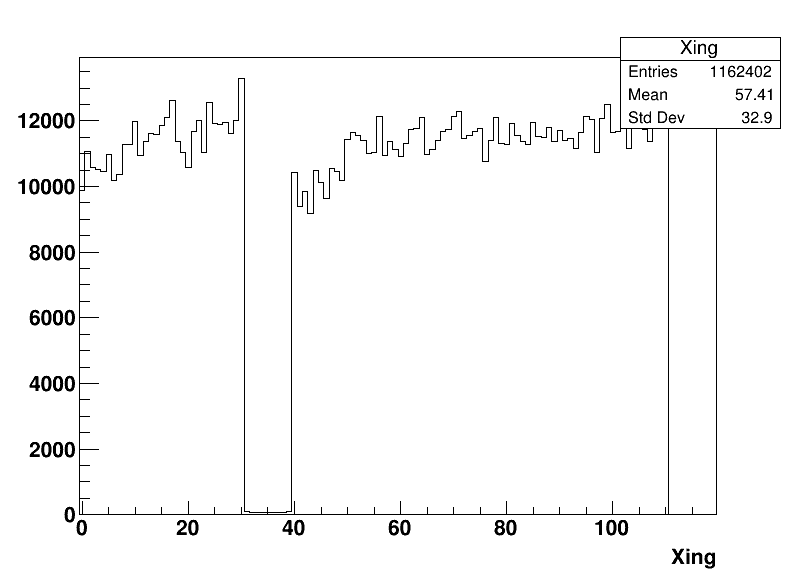

In [8]:
c = ROOT.TCanvas("c1","",800,600)
xing.Draw()
c.Draw()

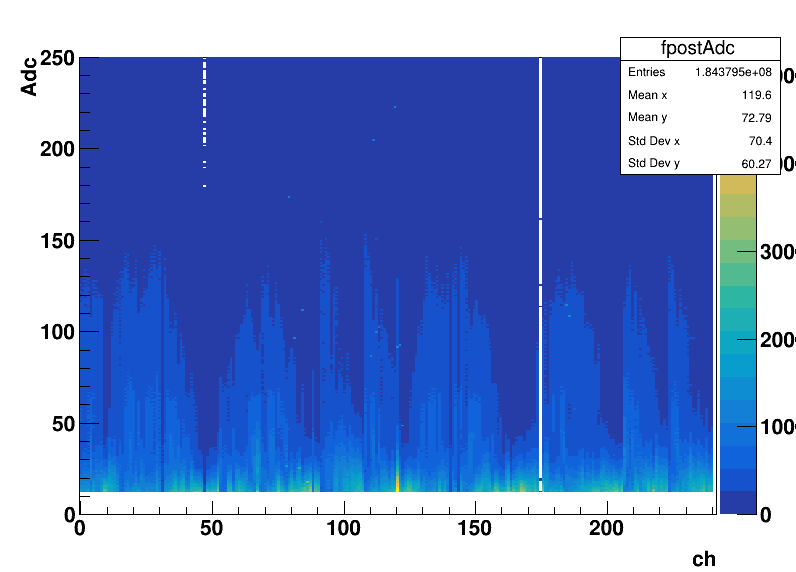

In [9]:
c = ROOT.TCanvas("c2", "", 800, 600)
H2 = file.Get('fpostAdc')
H2.Draw('pcolz')
c.Draw()

# Export An ADC Histogram

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


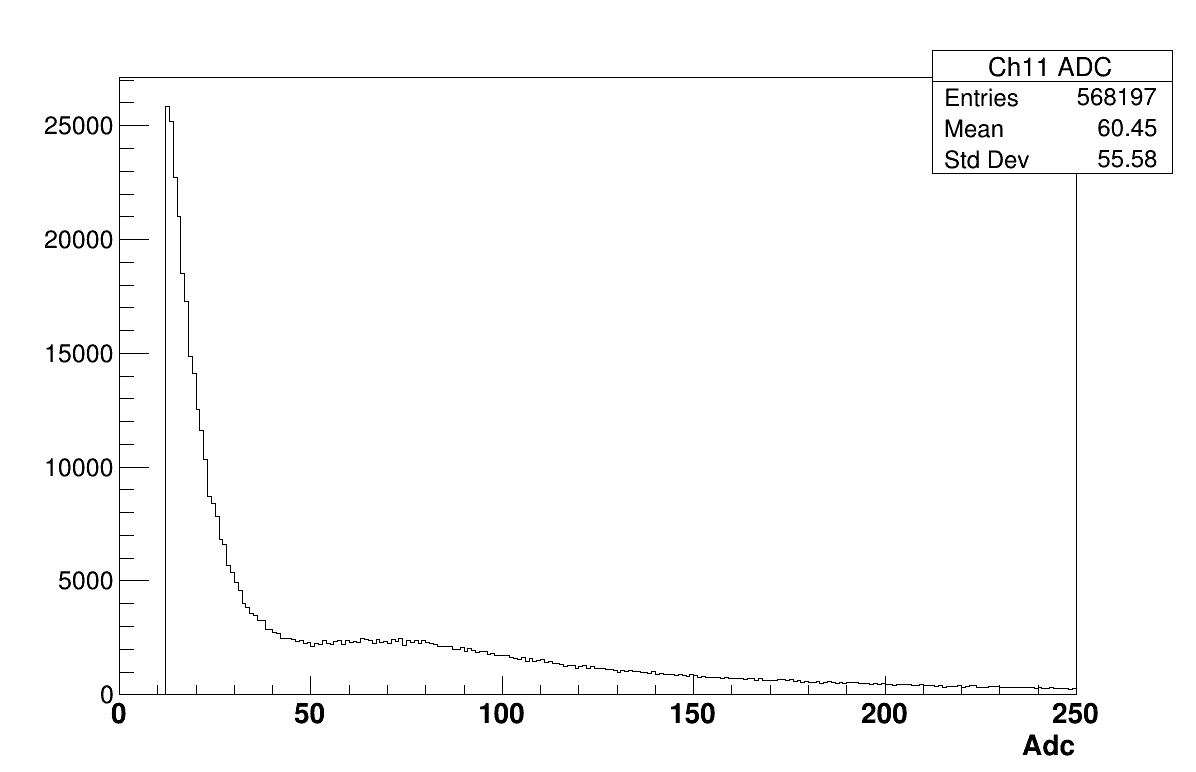

In [14]:
# Draw a spectrum
chTarget = 11
h = H2.ProjectionY("Ch{} ADC".format(chTarget), chTarget, chTarget)
c = ROOT.TCanvas("c3", "", 1200, 800)
h.Draw()
c.Draw()

In [15]:
# Export a spectrum to a text file
def export_th1d(h):
    '''
    Given an object of type ROOT.TH1D, loop over the bins of this histogram
    and export to a list of dictionaries, suitable to store as a JSON file.
    
    Args:
        h - ROOT.TH1D object to be converted into a python dictionary
    Returns:
        A list of dictionaries containing the data required to reconstruct
        the ROOT.TH1D
    '''
    bins_x = h.GetNbinsX()
    bin_indices = list(range(1,bins_x+1))
    
    hist_out = []
    for i in bin_indices:
        left = h.GetBinLowEdge(i)
        width = h.GetBinWidth(i)
        right = left + width
        center = h.GetBinCenter(i)
        content = h.GetBinContent(i)
        
        hist_out.append({
            'bin_center':center,
            'bin_left_edge':left,
            'bin_right_edge': right,
            'bin_content': content,
            'bin_idx': i,
        })
    return hist_out
hist = export_th1d(h)

In [16]:
import json

with open("Ch{}_ADC.json".format(chTarget), "w") as f:
    json.dump(hist, f)


# Confirm Export

In [17]:
%%bash 
ls -ltrh

total 1.5M
-rw-r--r-- 1 mikebeaumier mikebeaumier 1.4M May 28 18:05 merged_18087041.root
-rw-r--r-- 1 mikebeaumier mikebeaumier  291 May 28 18:07 README.md
-rw-r--r-- 1 mikebeaumier mikebeaumier  29K May 29 08:02 jupyter_notebook_config.py
-rw-r--r-- 1 mikebeaumier mikebeaumier  72K Jun  6 20:46 PyRoot Demo.ipynb
-rw-r--r-- 1 mikebeaumier mikebeaumier  27K Jun  6 20:47 Ch11_ADC.json
